# *Daily Weather Analysis* 🌦️

Welcome to our project! We will be using the [Weather Daily Dataset](https://www.kaggle.com/datasets/mysarahmadbhat/madrid-daily-weather) from Kaggle!. This project is to testing our skill of data analysis and using tool for data analysis. Thank you!

## LET'S GO!


- import pandas
- read_csv file and make into data fame

(Pandas will start looking from where your current python file is located. Therefore you can move from your current directory to where your data is located with '..')

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
df = pd.read_csv('Madrid_Daily_Weather_1997-2015_clean_data.csv') # ไฟล์ที่ลบ outliner ออก
data = pd.read_csv('Madrid Daily Weather 1997-2015 clean data add column.csv') # ไฟล์ที่ยังไม่มีการลบ Outliner

#delete white space from title
df.columns = df.columns.str.replace(" ","")
data.shape



(6812, 26)

### **Add value instead to NaN value**

In [25]:
# function fill month กรณีที่เดือนนั้นไม่มี event นั้นๆ ให้เติมเดือนและเติมค่า 0 แทนค่า NaN
def fill_months(event):
  freq = event['Month'].value_counts().reset_index()
  freq.columns = ['Month', 'Frequency']
  freq = freq.sort_values('Month')

  all_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
  freq = freq.set_index('Month').reindex(all_months, fill_value=0).reset_index()  # เติมค่า 0 ให้กับเดือนที่ไม่มี event นั้นเกิดขึ้น
  return freq

*Create data frame for each events*

In [26]:
def create_df(data, event) :  # create data frame for each events
  return pd.DataFrame(data[data['Events']==event])

### **Show Data**

*Correlation Plot (Temperature (°C) between 1997 and 2015)*

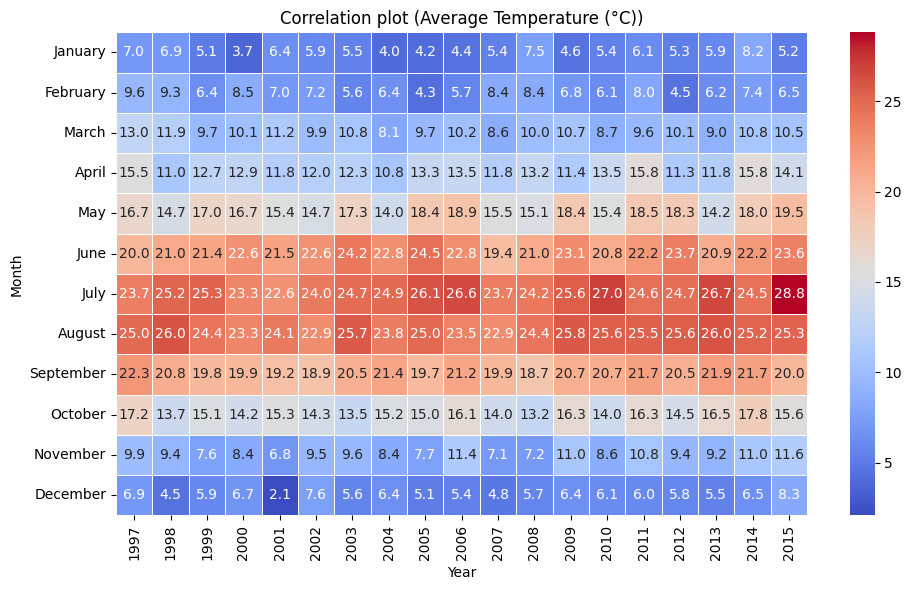

In [27]:
# สร้างลำดับของเดือนแบบเป็นจริง
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# ใช้ลำดับของเดือนเป็นลำดับใน DataFrame
data['Month'] = pd.Categorical(data['Month'], categories=months, ordered=True)

# สร้างตารางเพื่อจะเอาไปทำheatmap
heatmap_data = data.pivot_table(index='Month', columns='Year', values='Mean TemperatureC', aggfunc='mean')

# เติมค่าของเดือนที่หายไป (missing values) ด้วยค่าเฉลี่ยของเดือนที่เหลือ
for month in months:
    missing_values = heatmap_data.loc[month].isnull()
    mean_temperature = heatmap_data.loc[month].mean()
    heatmap_data.loc[month][missing_values] = mean_temperature

# สร้าง heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation plot (Average Temperature (°C))')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

- ฤดูหนาว (Winter) (ธันวาคม-มีนาคม) อากาศจะหนาวสุดๆ อุณหภูมิจะอยู่ประมาณ 0-9 องศา 
- ฤดูใบไม้ผลิ (Spring) (มีนาคม-มิถุนายน) อากาศกำลังเย็นสบาย อุณหภูมิจะอยู่ประมาณ 10-25 องศา
- ฤดูร้อน (Summer) (กรกฎาคม-กันยายน) เวลากลางวันจะยาวนานที่สุดในช่วงนี้ อุณหภูมิจะอยู่ประมาณ 25-45 องศา
- ฤดูใบไม้ร่วง (Autumn) (กันยายน-ธันวาคม) อากาศดี มีฝนตกเล็กน้อย อุณหภูมิจะอยู่ประมาณ 10-20 องศา


*Average Temperature (°C) between 1997 and 2015*

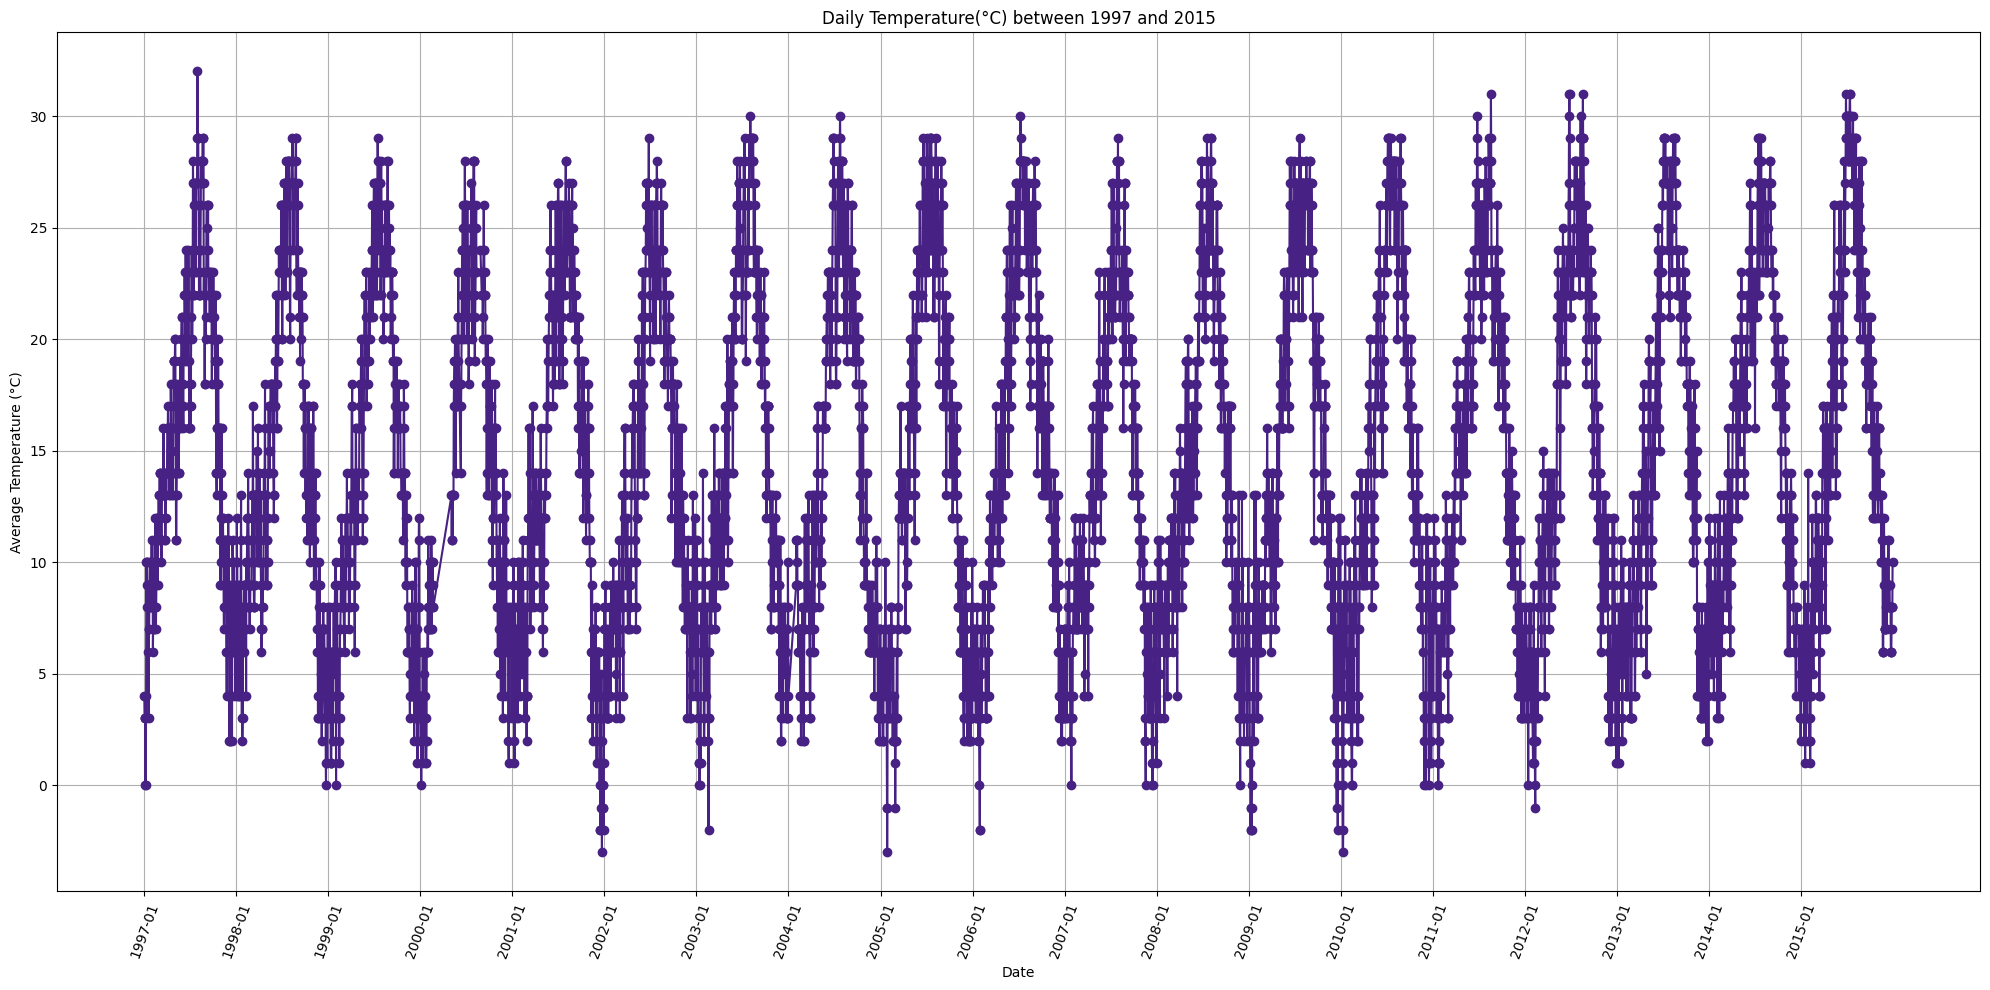

In [28]:
data['CET'] = pd.to_datetime(data['CET'], format='%Y-%m-%d')
# แปลงคอลัมน์ 'CET' และ 'MeanTemperatureC' ให้เป็น NumPy array
cet_values = data['CET'].values
temperature_values = data['Mean TemperatureC'].values
# print(cet_values)

# สร้างกราฟอุณหภูมิ
plt.figure(figsize=(20, 10))
plt.plot(cet_values, temperature_values, marker='o', linestyle='-', color='#472183')
plt.title('Daily Temperature(°C) between 1997 and 2015')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)

# กำหนดรูปแบบแกน x เฉพาะปีและเดือน
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# ใส่วันแรกของปีที่เลือก
years_to_include = [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
first_dates_of_years = [data[data['Year'] == year]['CET'].iloc[0] for year in years_to_include]

plt.xticks(first_dates_of_years, rotation=70)
plt.tight_layout()
plt.show()


In [29]:

foglist = ['Fog-Rain','Fog','Fog-Snow']
filter_fog = df[df['Events'].isin(foglist)]

fog_rain = create_df(filter_fog ,'Fog-Rain')
freqOfFogRain = fill_months(fog_rain)
frqfograin = freqOfFogRain['Frequency'].values.tolist()

fog = create_df(filter_fog ,'Fog')
freqOfFog = fill_months(fog)
frqfog = freqOfFog['Frequency'].values.tolist()

fog_snow = create_df(filter_fog ,'Fog-Snow')
freqOfFogsnow = fill_months(fog_snow)
frqfogsnow = freqOfFogsnow['Frequency'].values.tolist()

*Bar chart of rain events between 1997 and 2015*

(0.0, 160.0)

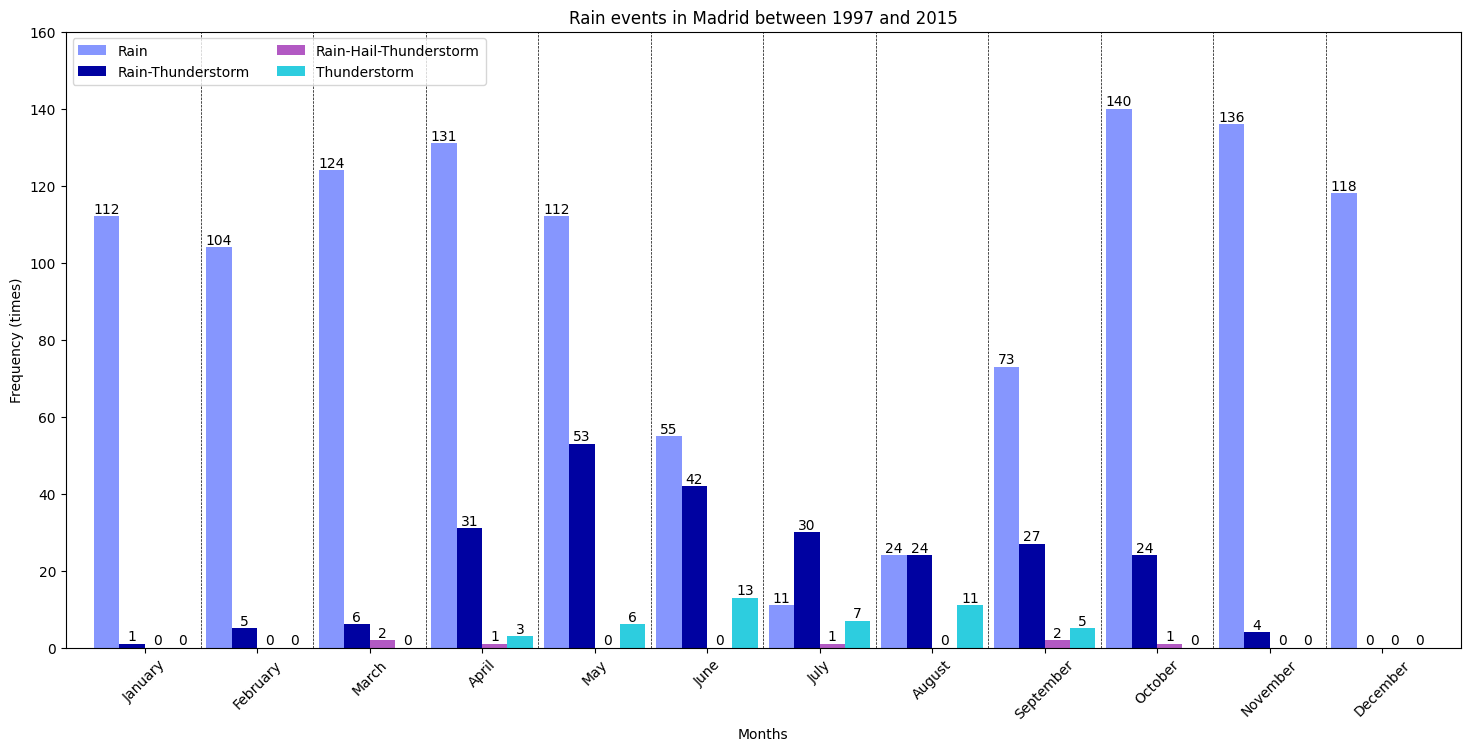

In [30]:
import pandas as pd

rain = ['Rain', 'Rain-Thunderstorm', 'Rain-Hail-Thunderstorm', 'Thunderstorm']
filter_rain = df[df['Events'].isin(rain)]
filter_rain = filter_rain[['Month','Events']]

rain = create_df(filter_rain, 'Rain') 
freqOfRain = fill_months(rain)
frqrain = freqOfRain['Frequency'].values.tolist()

rain_thunder = create_df(filter_rain, 'Rain-Thunderstorm') 
freqOfRainThunder = fill_months(rain_thunder)
frqtrainthunder = freqOfRainThunder['Frequency'].values.tolist()

rain_hail = create_df(filter_rain, 'Rain-Hail-Thunderstorm') 
freqOfRainHail = fill_months(rain_hail)
frqrainhail = freqOfRainHail['Frequency'].values.tolist()

thunder = create_df(filter_rain, 'Thunderstorm') 
freqOfThunder = fill_months(thunder)
frqthunder = freqOfThunder['Frequency'].values.tolist()
rain_df = pd.DataFrame({'Rain': frqrain,
                        'Rain-Thunderstorm': frqtrainthunder,
                        'Rain-Hail-Thunderstorm':frqrainhail,
                        'Thunderstorm' : frqthunder,
                       }, index=months)

ax = rain_df.plot.bar(figsize=(18,8),rot=45,color=['#8696FE','#0002A1','#B259C3','#2DCDDF'],width=0.9) #create bar chart

for i in range(1, len(months)):
    ax.axvline(x= i - 0.5, color='black', linestyle='--', linewidth=0.5) 

for container in ax.containers: #show value for each bar (for bar chart)
    ax.bar_label(container)

ax.set_ylabel('Frequency (times)')
ax.set_xlabel('Months')
ax.set_title('Rain events in Madrid between 1997 and 2015')
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 160)

*Percentage of rain events between 1997 and 2015*

In [31]:
total = rain_df.sum()
percentage = (rain_df / total) * 100
percentage.loc['Total'] = percentage.sum()
print(percentage)

                 Rain  Rain-Thunderstorm  Rain-Hail-Thunderstorm  Thunderstorm
January      9.824561           0.404858                0.000000      0.000000
February     9.122807           2.024291                0.000000      0.000000
March       10.877193           2.429150               28.571429      0.000000
April       11.491228          12.550607               14.285714      6.666667
May          9.824561          21.457490                0.000000     13.333333
June         4.824561          17.004049                0.000000     28.888889
July         0.964912          12.145749               14.285714     15.555556
August       2.105263           9.716599                0.000000     24.444444
September    6.403509          10.931174               28.571429     11.111111
October     12.280702           9.716599               14.285714      0.000000
November    11.929825           1.619433                0.000000      0.000000
December    10.350877           0.000000            

*Bar chart of snow events between 1997 and 2015*

(0.0, 15.0)

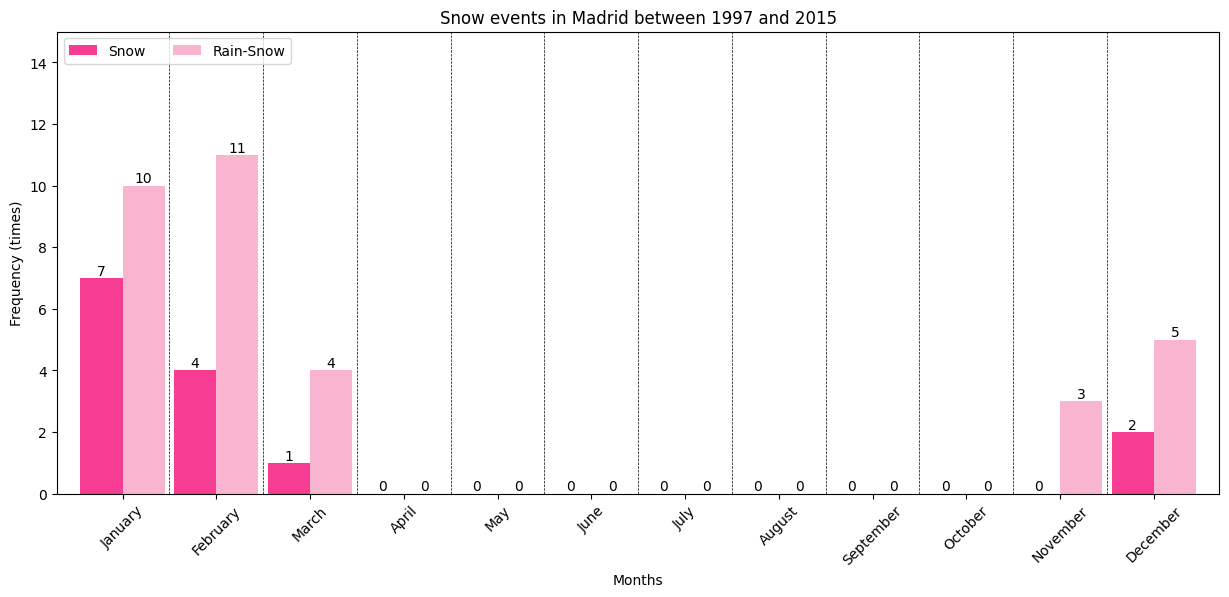

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

snow = ['Snow','Rain-Snow']
filter_snow = df[df['Events'].isin(snow)]
filter_snow = filter_snow[['Month','Events']]

snow = create_df(filter_snow, 'Snow')
freqOfSnow = fill_months(snow)
frqsnow = freqOfSnow['Frequency'].values.tolist()

rain_snow = create_df(filter_snow, 'Rain-Snow')
freqOfRainsnow = fill_months(rain_snow)
frqrainsnow = freqOfRainsnow['Frequency'].values.tolist()

# Create a DataFrame for plotting
snow_df = pd.DataFrame({'Snow': frqsnow, 'Rain-Snow': frqrainsnow}, index=months)

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ax = snow_df.plot.bar(ax=ax, rot=45, color=['#F73D93', '#F9B5D0'], width=0.9)

# Add vertical lines between months
for i in range(1, len(months)):
    ax.axvline(x=i - 0.5, color='black', linestyle='--', linewidth=0.5)

# Annotate the bars with values
for container in ax.containers:
    ax.bar_label(container)

# Set labels and title
ax.set_ylabel('Frequency (times)')
ax.set_xlabel('Months')
ax.set_title('Snow events in Madrid between 1997 and 2015')
# Set the legend
ax.legend(loc='upper left', ncols=3)
# Set the y-axis limit
ax.set_ylim(0, 15)


*Percentage of group snow events between 1997 and 2015*

In [33]:
total = snow_df.sum()
percentage = (snow_df / total) * 100
percentage.loc['Total'] = percentage.sum()
print(percentage)

                 Snow   Rain-Snow
January     50.000000   30.303030
February    28.571429   33.333333
March        7.142857   12.121212
April        0.000000    0.000000
May          0.000000    0.000000
June         0.000000    0.000000
July         0.000000    0.000000
August       0.000000    0.000000
September    0.000000    0.000000
October      0.000000    0.000000
November     0.000000    9.090909
December    14.285714   15.151515
Total      100.000000  100.000000


*Bar chart of fogs events between 1997 and 2015*

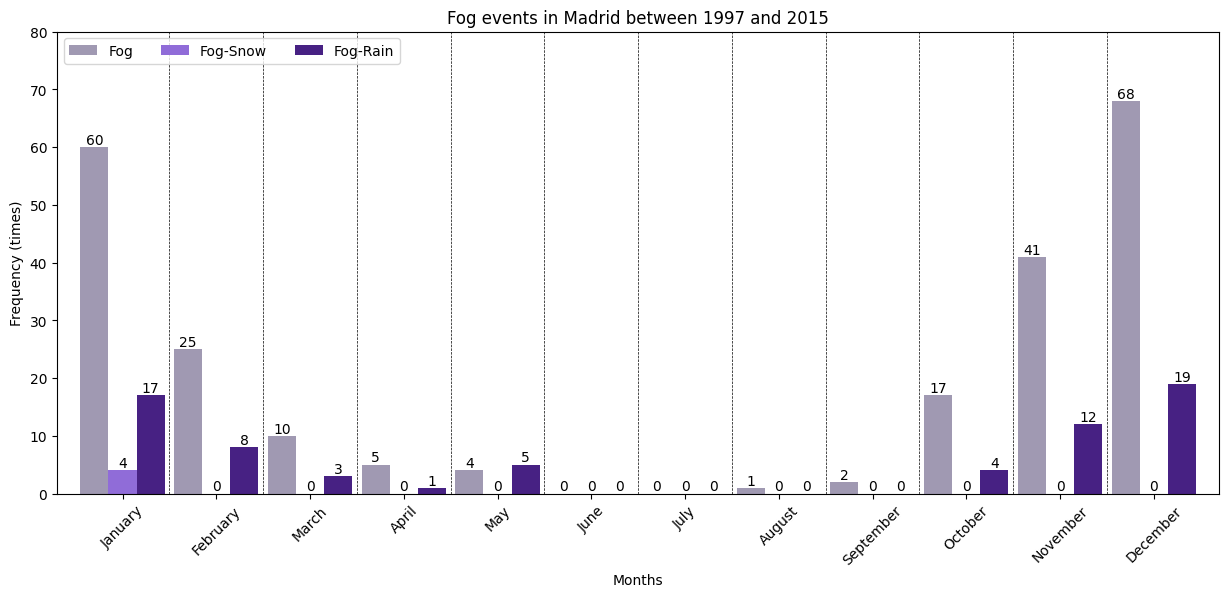

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

foglist = ['Fog-Rain','Fog','Fog-Snow']
filter_fog = df[df['Events'].isin(foglist)]
filter_fog = filter_fog[['Month','Events']]

fog_rain = create_df(filter_fog ,'Fog-Rain')
freqOfFogRain = fill_months(fog_rain)
frqfograin = freqOfFogRain['Frequency'].values.tolist()

fog = create_df(filter_fog ,'Fog')
freqOfFog = fill_months(fog)
frqfog = freqOfFog['Frequency'].values.tolist()

fog_snow = create_df(filter_fog ,'Fog-Snow')
freqOfFogsnow = fill_months(fog_snow)
frqfogsnow = freqOfFogsnow['Frequency'].values.tolist()

fog_df = pd.DataFrame({'Fog': frqfog,
                       'Fog-Snow' : frqfogsnow,
                       'Fog-Rain' : frqfograin}, index=months)


ax = fog_df.plot.bar(figsize=(15,6),rot=45, color=['#A099B2','#906CD8','#472183'],width=0.9)

for i in range(1, len(months)):
    ax.axvline(x= i - 0.5, color='black', linestyle='--', linewidth=0.5) 

for container in ax.containers: #show value for each bar (for bar chart)
    ax.bar_label(container)

ax.set_ylabel('Frequency (times)')
ax.set_xlabel('Months')
ax.set_title('Fog events in Madrid between 1997 and 2015')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 80)
plt.show()

*Percentage of fog events between 1997 and 2015*

In [35]:
total = fog_df.sum()
percentage = (fog_df / total) * 100
percentage.loc['Total'] = percentage.sum()
print(percentage)

                  Fog  Fog-Snow    Fog-Rain
January     25.751073     100.0   24.637681
February    10.729614       0.0   11.594203
March        4.291845       0.0    4.347826
April        2.145923       0.0    1.449275
May          1.716738       0.0    7.246377
June         0.000000       0.0    0.000000
July         0.000000       0.0    0.000000
August       0.429185       0.0    0.000000
September    0.858369       0.0    0.000000
October      7.296137       0.0    5.797101
November    17.596567       0.0   17.391304
December    29.184549       0.0   27.536232
Total      100.000000     100.0  100.000000


*Bar chart of all events between 1997 and 2015*

(0.0, 160.0)

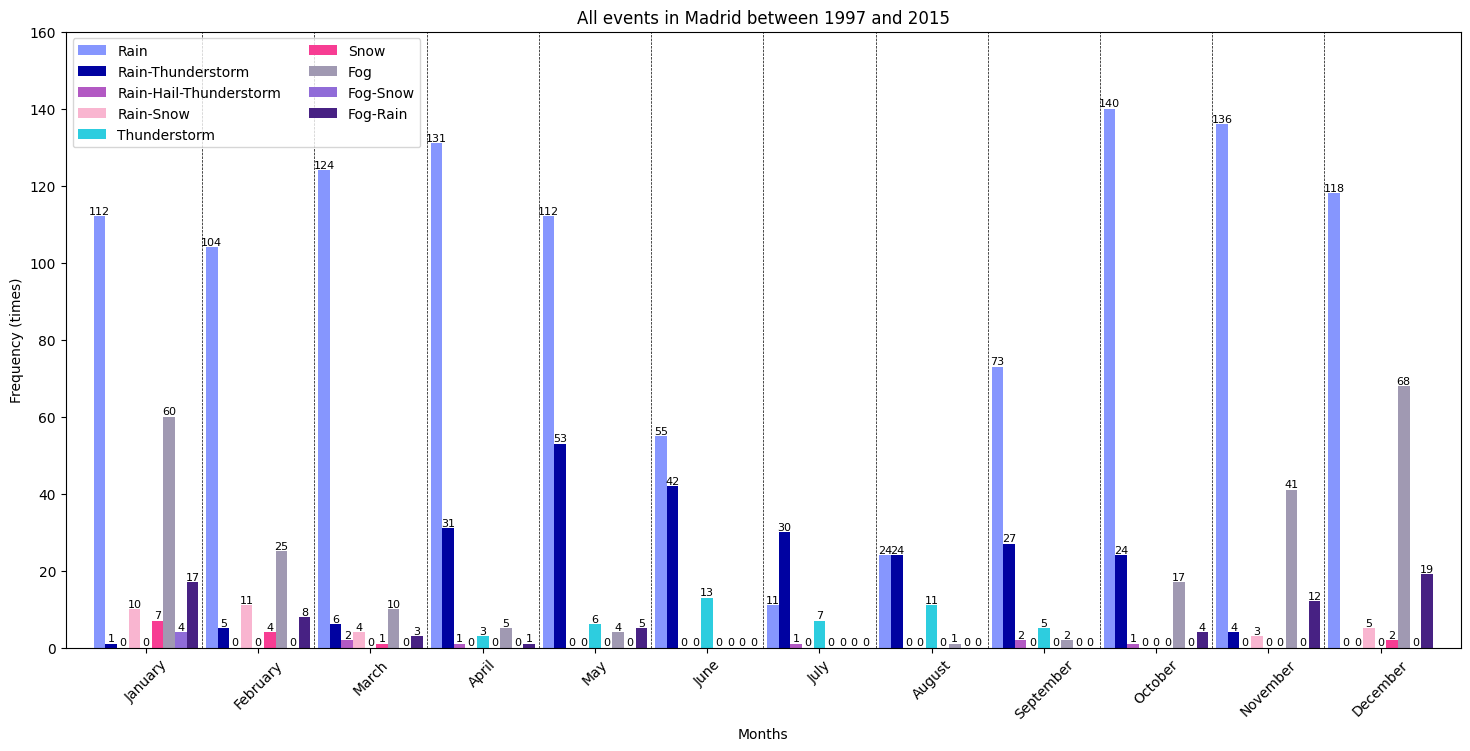

In [36]:
all_events = pd.DataFrame({'Rain': frqrain,
                        'Rain-Thunderstorm': frqtrainthunder,
                        'Rain-Hail-Thunderstorm':frqrainhail,
                        'Rain-Snow' : frqrainsnow,
                        'Thunderstorm' : frqthunder,
                        'Snow' : frqsnow,
                        'Fog' : frqfog,
                        'Fog-Snow' : frqfogsnow,
                        'Fog-Rain' : frqfograin
                       }, index=months)

ax = all_events.plot.bar(figsize=(18,8),rot=45,width=0.93,color=['#8696FE', '#0002A1', '#B259C3', '#F9B5D0', '#2DCDDF', '#F73D93','#A099B2','#906CD8','#472183']) #create bar chart
# Add lines to separate data for different months
for i in range(1, len(months)):
    ax.axvline(x= i - 0.5, color='black', linestyle='--', linewidth=0.5) 

for container in ax.containers: #show value for each bar (for bar chart)
    ax.bar_label(container,fontsize=8)

ax.set_ylabel('Frequency (times)')
ax.set_xlabel('Months')
ax.set_title('All events in Madrid between 1997 and 2015')
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 160)

*Percentage of all events between 1997 and 2015*

In [37]:
total = all_events.sum()
percentage = (all_events / total) * 100
percentage.loc['Total'] = percentage.sum()

print(percentage)

                 Rain  Rain-Thunderstorm  Rain-Hail-Thunderstorm   Rain-Snow  \
January      9.824561           0.404858                0.000000   30.303030   
February     9.122807           2.024291                0.000000   33.333333   
March       10.877193           2.429150               28.571429   12.121212   
April       11.491228          12.550607               14.285714    0.000000   
May          9.824561          21.457490                0.000000    0.000000   
June         4.824561          17.004049                0.000000    0.000000   
July         0.964912          12.145749               14.285714    0.000000   
August       2.105263           9.716599                0.000000    0.000000   
September    6.403509          10.931174               28.571429    0.000000   
October     12.280702           9.716599               14.285714    0.000000   
November    11.929825           1.619433                0.000000    9.090909   
December    10.350877           0.000000

(0.0, 15.0)

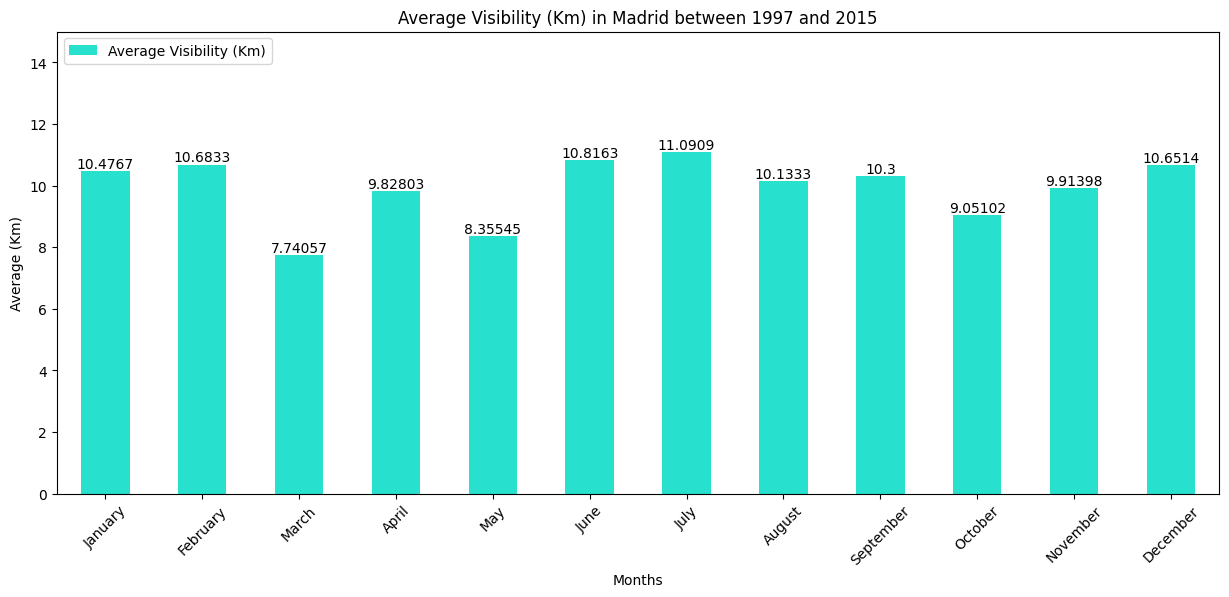

In [38]:
# visibility bar chart

meanOfvis = df.groupby('Month')['MeanVisibilityKm'].mean().values.tolist()

data = pd.DataFrame({'Average Visibility (Km)': meanOfvis}, index=months)

ax = data.plot.bar(figsize=(15,6),rot=45,color='#27E1CE')

for container in ax.containers: # show value for each bar (for bar chart)
    ax.bar_label(container)

ax.set_ylabel('Average (Km)')
ax.set_xlabel('Months')
ax.set_title('Average Visibility (Km) in Madrid between 1997 and 2015')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 15)

ทุกเดือนยกเว้นเดือนมีนาคมมีค่า visibility มากกว่า 8 km ทำให้มองเห็นได้ดี ไม่เป็นอันตรายต่อการบิน สามารถบินไปยัง madrid ได้ และเนื่องจากเดือนมีนาคมมีค่าต่ำกว่า 8 km อาจจะมีลักษณะอากาศที่เป็นอันตรายต่อการบิน เช่น ฝนตกปานกลาง พายุฟ้าคะนอง หรือมีหมอกบางๆ
อ้างอิงจาก [กองอุตุนิยมวิทยาการบิน](http://www2.aeromet.tmd.go.th/KnowledgeOVisibility.php)

(0.0, 1.0)

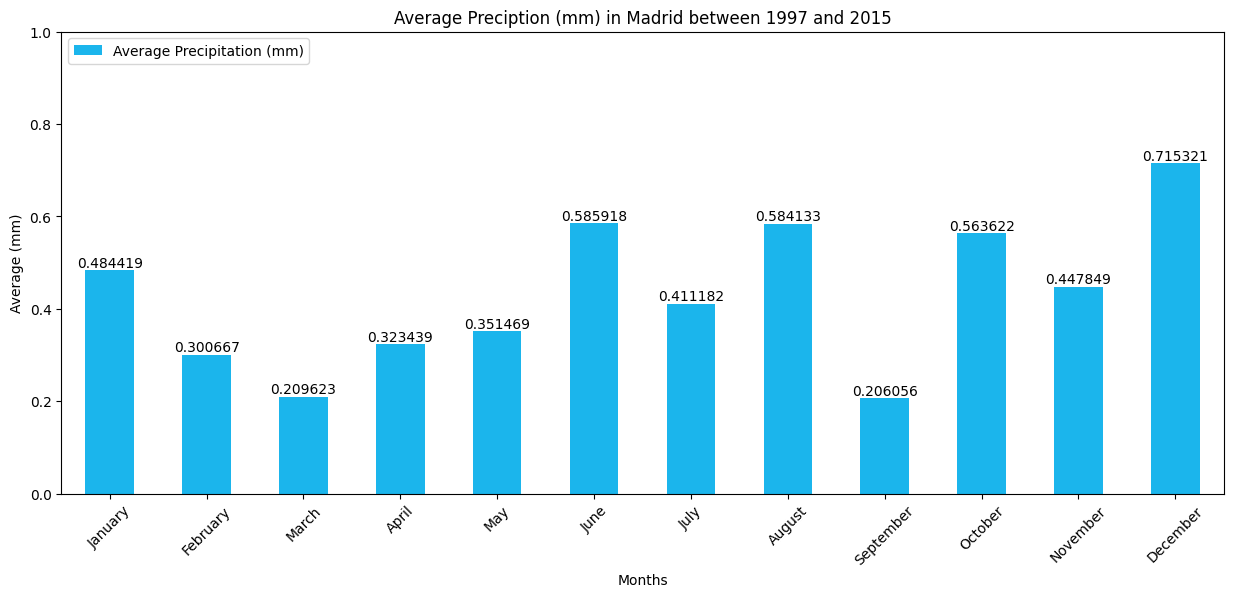

In [39]:
meanOfprecip = df.groupby('Month')['Precipitationmm'].mean().values.tolist()
meanOfcloud = df.groupby('Month')['CloudCover'].mean().values.tolist()
meanOfwind = df.groupby('Month')['MeanWindSpeedKm/h'].mean().values.tolist()
meanOfhumi = df.groupby('Month')['MeanHumidity'].mean().values.tolist()

data = pd.DataFrame({'Average Precipitation (mm)': meanOfprecip}, index=months)

ax = data.plot.bar(figsize=(15,6),rot=45,color='#1BB5EC')

for container in ax.containers: # show value for each bar (for bar chart)
    ax.bar_label(container)

ax.set_ylabel('Average (mm)')
ax.set_xlabel('Months')
ax.set_title('Average Preciption (mm) in Madrid between 1997 and 2015')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

(0.0, 100.0)

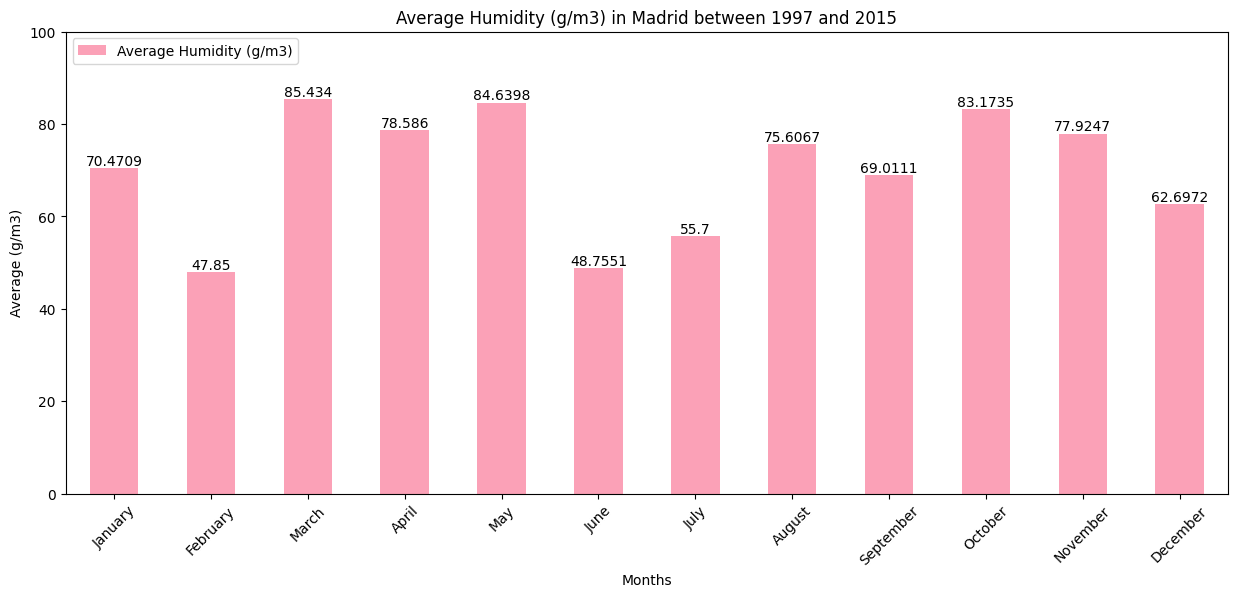

In [40]:
data = pd.DataFrame({'Average Humidity (g/m3)': meanOfhumi}, index=months)

ax = data.plot.bar(figsize=(15,6),rot=45,color='#FBA1B7')

for container in ax.containers: # show value for each bar (for bar chart)
    ax.bar_label(container)

ax.set_ylabel('Average (g/m3)')
ax.set_xlabel('Months')
ax.set_title('Average Humidity (g/m3) in Madrid between 1997 and 2015')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

ค่าเฉลี่ยของปริมาณน้ำฝนคือมักจะมีฝนตกเล็กน้อยในแต่ละเดือนของช่วงปี 1997-2015 เนื่องจากมีปริมาณน้ำฝนอยู่ระหว่าง 0.1-10.0 มิลลิเมตร
อ้างอิงจาก [กรมฝนหลวงและการบินเกษตร](https://www.royalrain.go.th/royalrain/ShowDetail.aspx?DetailId=10384)

(0.0, 9.0)

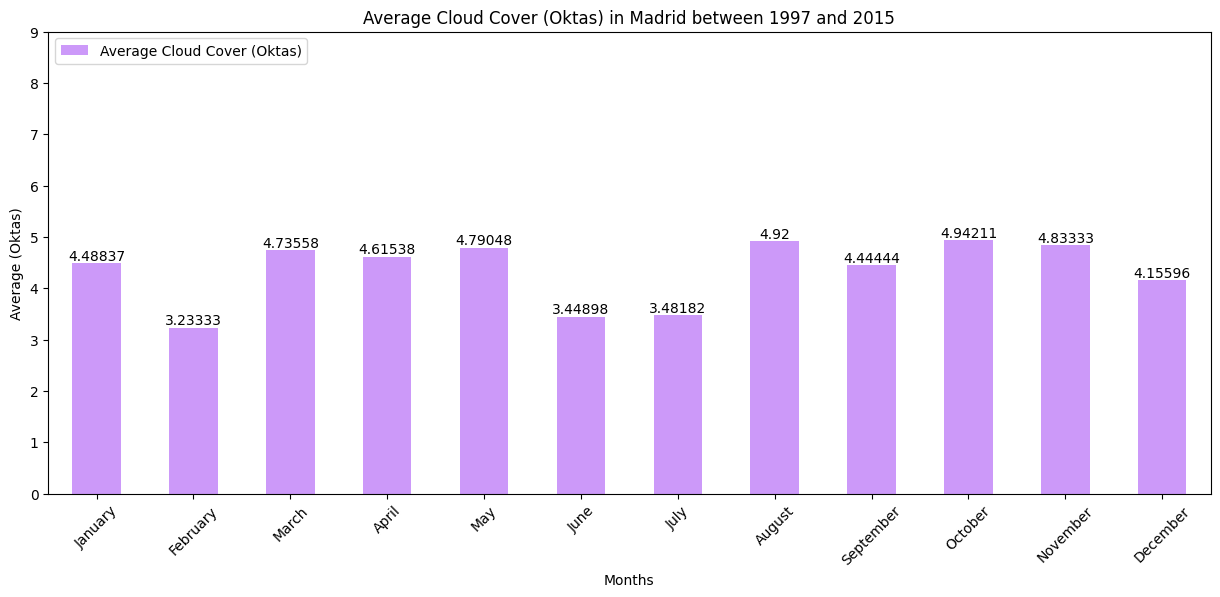

In [41]:
data = pd.DataFrame({'Average Cloud Cover (Oktas)': meanOfcloud}, index=months)

ax = data.plot.bar(figsize=(15,6),rot=45,color='#CC99F9')

for container in ax.containers: # show value for each bar (for bar chart)
    ax.bar_label(container)

ax.set_ylabel('Average (Oktas)')
ax.set_xlabel('Months')
ax.set_title('Average Cloud Cover (Oktas) in Madrid between 1997 and 2015')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 9)  # ค่า cloud มี 9 ค่า

ในช่วงเดือนที่มีค่า Cloud Cover มากกว่า 4 จะมีเมฆปกคลุมประมาณ 1/2 ของท้องฟ้าทั้งหมด และในช่วงเดือนที่มากกว่า 3 แต่ไม่มากกว่า 4 จะมีเมฆปกคลุมอยู่ประมาณ มากกว่า 2/4 แต่ไม่ถึง 3/4 ของท้องฟ้าทั้งหมด
อ้างอิงจาก [Wikipedia](https://en.wikipedia.org/wiki/Okta)



![Cloud Cover](https://skyteamaviation.com/wp-content/uploads/2018/08/Cloud-cover-346x480.png.webp)

(0.0, 20.0)

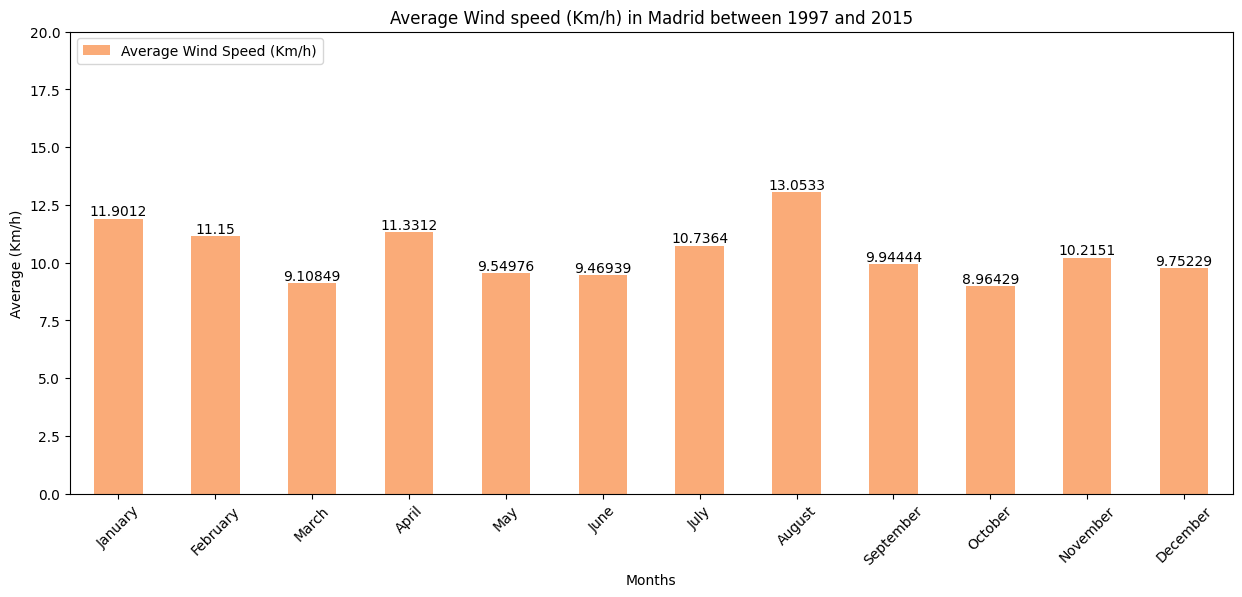

In [42]:
data = pd.DataFrame({'Average Wind Speed (Km/h)': meanOfwind}, index=months)

ax = data.plot.bar(figsize=(15,6),rot=45,color='#FAAB78')

for container in ax.containers: # show value for each bar (for bar chart)
    ax.bar_label(container)

ax.set_ylabel('Average (Km/h)')
ax.set_xlabel('Months')
ax.set_title('Average Wind speed (Km/h) in Madrid between 1997 and 2015')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 20)

ช่วงเดือนที่ความเร็วลมน้อยกว่า 12 Km/h เกิดลมอ่อนๆ รู้สึกลมพัดที่หน้า ใบไม้แกว่งไกว ศรหันไปตามทิศทางลม
และในช่วงที่มีความเร็วลมมากกว่า 12 Km/h เกิดลมโชย ใบไม้และกิ่งไม้เล็กๆ กระดิก ธงปลิว
อ้างอิงจาก [สถานีตรวจวัดอากาศอัตโนมัติ](http://weather.nakhonthai.net/index.php?ind=reviews&op=entry_view&iden=7)

# Conclude Table

In [51]:
meanTemp = data.groupby('Month')['Mean TemperatureC'].mean().values.tolist()
tablestyles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'Black')])]

tablestr = pd.DataFrame({
    'Months': months,
    'Average Temperature(°C)': meanTemp,
    'Average Visibility(Km)': meanOfvis,
    'Average Percipitaion(mm)': meanOfprecip,
    'Average Cloud Cover(Oktas)': meanOfcloud,
    'Average Wind Speed(Km/h)': meanOfwind,
    'Average Humidity(g/m3)':meanOfhumi                                                                                                                     
})

tablestr = tablestr.T
tablestr = tablestr.style.set_caption('Conditions Information of Madird between 1997-2015').set_table_styles(tablestyles)
tablestr

,0,1,2,3,4,5,6,7,8,9,10,11
Months,January,February,March,April,May,June,July,August,September,October,November,December
Average Temperature(°C),12.859259,24.785965,5.859083,6.947070,5.688730,25.074703,22.116071,10.148746,16.667235,9.196491,15.152801,20.494737
Average Visibility(Km),10.476744,10.683333,7.740566,9.828025,8.355450,10.816327,11.090909,10.133333,10.300000,9.051020,9.913978,10.651376
Average Percipitaion(mm),0.484419,0.300667,0.209623,0.323439,0.351469,0.585918,0.411182,0.584133,0.206056,0.563622,0.447849,0.715321
Average Cloud Cover(Oktas),4.488372,3.233333,4.735577,4.615385,4.790476,3.448980,3.481818,4.920000,4.444444,4.942105,4.833333,4.155963
Average Wind Speed(Km/h),11.901163,11.150000,9.108491,11.331210,9.549763,9.469388,10.736364,13.053333,9.944444,8.964286,10.215054,9.752294
Average Humidity(g/m3),70.470930,47.850000,85.433962,78.585987,84.639810,48.755102,55.700000,75.606667,69.011111,83.173469,77.924731,62.697248


In [ ]:
def tempCondintion(t):
    #https://www.tmd.go.th/info/
    result = []
    for i in t :
        if i <= 7.9 :
            result.append('VeryCold')
        elif 8 <= i <= 15.9:
            result.append("Cold")
        elif 16 <= i <= 22.9:
            result.append("Cool")
        else:
            result.append("Warm")
    return result

def visibilityConditon(t):
    result=[]
    for i in t:
        if i > 8:
            result.append('Great!')
        if  2 < i <= 8:
            result.append('May have obstacle')  
    return result

def precipitationConditon(t):
    result=[]
    for i in t:
        if 0 < i <= 0.5 :
            result.append('between 0 and 0.5')
        else:
            result.append('between 0.6 and 1.0')
    return result

def cloudcoverConditon(t):
    result=[]
    for i in t:
        if int(i) == 4 :
            result.append('Sky half cloudy')
        else:
            result.append('Sky almost half cloudy')
    return result    

def windspeedConditon(t):
    result=[]
    for i in t:
        if i < 10:
            result.append('~12 Km/h')
        else:
            result.append('~9 Km/h')
    return result    

def humidityCondition(t):
    result=[]
    for i in t:
        if 30 < i < 60 :
            result.append('Medium(Comfort)')
        elif i > 60:
            result.append('High(Muggy)')
        elif i <30 :
            result.append('Low')
    return result


def drop_color(x):
    if x == 'VeryCold':
        return f'background-color :#72aee6 ; color: black'
    elif x == 'Cold':
        return f'background-color :#9ec2e6 ; color: black'
    elif x == 'Cool':
        return f'background-color :#c5d9ed ; color: black'
    elif x == 'Warm':
        return f'background-color :#f2cbbb ; color: black'
    
    elif x == 'Great!':
        return f'background-color :#72aee6 ; color: black' 
    elif x == 'May have obstacle':
        return f'background-color :#c5d9ed ; color: black'

    elif x == 'between 0 and 0.5':
        return f'background-color :#f0f6fc ; color: black'
    elif x == 'between 0.6 and 1.0':
        return f'background-color :#c5d9ed ; color: black'
    
    elif x == 'Sky half cloudy':
        return f'background-color :#c5d9ed ; color: black'
    
    elif x == 'Sky almost half cloudy':
        return f'background-color :#f0f6fc  ; color: black'

    elif x == '~12 Km/h':
        return f'background-color :#c5d9ed  ; color: black'
    elif x == '~9 Km/h':
        return f'background-color :#f0f6fc ; color: black'
    
    elif x == 'Medium(Comfort)':
        return f'background-color :#f0f6fc ; color: black'
    elif x == 'High(Muggy)':
        return f'background-color :#72aee6 ; color: black'
    # elif x == 'Low':
    #     return f'background-color :#e9f6a1 ; color: black'
    
    if type(x) == int or type(x) == float:
        if x > 105:
            return f'background-color :#72aee6 ; color: black'#blue20
        elif 70 < x <= 105:
            return f'background-color :#9ec2e6 ; color: black'#blue10
        elif 35 < x <= 70:
            return f'background-color :#c5d9ed ; color: black' #blue5
        elif x <= 35:
            return f'background-color :#f0f6fc ; color: black' #blue0
    return ''

meansTempStr = tempCondintion(meanTemp)
meansOfvisStr = visibilityConditon(meanOfvis)
meanOfprecipStr = precipitationConditon(meanOfprecip)
meanOfcloudStr = cloudcoverConditon(meanOfcloud)
meanOfwindStr = windspeedConditon(meanOfwind)
meanOfhumiStr = humidityCondition(meanOfhumi)

tablestyles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("color", 'White')])]

tablestr = pd.DataFrame({
    'Months': months,
    'Temperature': meansTempStr,
    'Visibility': meansOfvisStr,
    'Percipitaion': meanOfprecipStr,
    'Cloud Cover': meanOfcloudStr,
    'Wind Speed': meanOfwindStr,
    'Humidity':meanOfhumiStr                                                                                                                     
})

tablestr = tablestr.T
tablestr = tablestr.style.set_caption('Information of Madird between 1997-2015').set_table_styles(tablestyles).map(drop_color)
tablestr.set_properties(
    **{'border': '1px black solid !important'}
).set_table_styles([
    # Selector 1
    {'selector': '',
     'props': [('border', '2px black solid !important')]},
    # Selector 2
    {'selector': 'caption',
     'props': [
         ('color', 'white'), #Header
         ('font-size', '25px'),
         ('text-align', 'center'),
         ('border', '3px black solid !important')]},
    # Selector 3
    {'selector': 'th', 'props': [
        ('font-size', '10pt'),
        ('border-style', 'solid'),
        ('border-width', '1px'),
        ('border-color', 'black')  # Missing Border Color here
    ]}
])


AttributeError: 'Styler' object has no attribute 'map'

In [ ]:
tableEvent = pd.DataFrame({
    'Months': months,
    'Rain (times)': frqrain,
    'Rain-Thunderstorm (times)': frqtrainthunder,
    'Rain-Hail-Thunderstorm (times)':frqrainhail,
    'Rain-Snow (times)' : frqrainsnow,
    'Thunderstorm (times)' : frqthunder,
    'Snow (times)' : frqsnow,
    'Fog (times)' : frqfog,
    'Fog-Snow (times)' : frqfogsnow,    
    'Fog-Rain (times)' : frqfograin,
})
tableEvent['Total'] = tableEvent['Rain (times)'] + tableEvent['Rain-Thunderstorm (times)']+tableEvent['Rain-Hail-Thunderstorm (times)']+tableEvent['Rain-Snow (times)'] 
tableEvent['Total'] = tableEvent['Total']+tableEvent['Thunderstorm (times)'] + tableEvent['Snow (times)']+tableEvent['Fog (times)']
tableEvent['Total'] = tableEvent['Total'] + tableEvent['Fog-Snow (times)'] + tableEvent['Fog-Rain (times)']
tableEvent = tableEvent.T
tableEvent = tableEvent.round(3).style.set_caption('Frequency of Events in Madird between 1997-2015').set_table_styles(tablestyles)
tableEvent.set_properties(
    **{'border': '1px black solid !important'}
).set_table_styles([
    # Selector 1
    {'selector': '',
     'props': [('border', '2px black solid !important')]},
    # Selector 2
    {'selector': 'caption',
     'props': [
         ('color', 'white'), #Header
         ('font-size', '25px'),
         ('text-align', 'center'),
         ('border', '3px black solid !important')]},
    # Selector 3
    {'selector': 'th', 'props': [
        ('font-size', '10pt'),
        ('border-style', 'solid'),
        ('border-width', '1px'),
        ('border-color', 'black')  # Missing Border Color here
    ]}
])


,0,1,2,3,4,5,6,7,8,9,10,11
Months,January,February,March,April,May,June,July,August,September,October,November,December
Rain (times),112,104,124,131,112,55,11,24,73,140,136,118
Rain-Thunderstorm (times),1,5,6,31,53,42,30,24,27,24,4,0
Rain-Hail-Thunderstorm (times),0,0,2,1,0,0,1,0,2,1,0,0
Rain-Snow (times),10,11,4,0,0,0,0,0,0,0,3,5
Thunderstorm (times),0,0,0,3,6,13,7,11,5,0,0,0
Snow (times),7,4,1,0,0,0,0,0,0,0,0,2
Fog (times),60,25,10,5,4,0,0,1,2,17,41,68
Fog-Snow (times),4,0,0,0,0,0,0,0,0,0,0,0
Fog-Rain (times),17,8,3,1,5,0,0,0,0,4,12,19
